In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential, layers
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical

2024-11-25 12:07:19.688087: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-11-25 12:07:20.124720: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-11-25 12:07:22.071484: I tensorflow/c/logging.cc:34] Successfully opened dynamic library libdirectml.d6f03b303ac3c4f2eeb8ca631688c9757b361310.so
2024-11-25 12:07:22.071566: I tensorflow/c/logging.cc:34] Successfully opened dynamic library libdxcore.so
2024-11-25 12:07:22.073960: I tensorflow/c/logging.cc:34] Successfully opened dynamic l

In [2]:
(train_img, train_lb), (test_img, test_lb) = tf.keras.datasets.mnist.load_data()

print(train_img.shape, train_lb.shape, test_img.shape, test_lb.shape, '\n')

# set random seed
np.random.seed(42)
trainsize = 10000  # number of training images we use, selected randomly
randtrain = np.random.choice(train_img.shape[0], trainsize, replace=False)
X_train, y_train = train_img[randtrain], train_lb[randtrain]

np.random.seed(10)
testsize = 10000  # number of testing images we use, selected randomly
randtest = np.random.choice(test_img.shape[0], testsize, replace=False)
X_test, y_test = test_img[randtest], test_lb[randtest]

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)


11490434/11490434 [==============================] - 4s 0us/step
(60000, 28, 28) (60000,) (10000, 28, 28) (10000,) 

(10000, 28, 28) (10000,) (10000, 28, 28) (10000,)


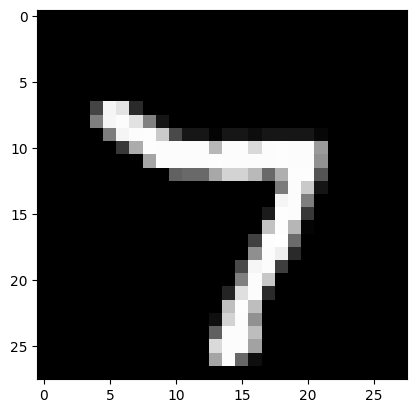

In [4]:
# demonstrate an image
plt.figure()
plt.imshow(X_train[0])
plt.imshow(X_train[0], cmap='gray')
plt.show()

In [5]:
# build the cnn model
model = Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Flatten())
model.add(layers.Dense(128))
model.add(layers.Dense(10, activation='softmax'))

2024-11-25 12:08:24.076825: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-11-25 12:08:24.077874: I tensorflow/c/logging.cc:34] DirectML: creating device on adapter 0 (Intel(R) Iris(R) Xe Graphics)
2024-11-25 12:08:24.102358: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-11-25 12:08:24.102417: W tensorflow/core/common_runtime/pluggable_device/pluggable_device_bfc_allocator.cc:28] Overriding allow_growth setting because force_memory_growth was requested by the device.
2024-11-25 12:08:24.102439: I tensorflow/core/common_runtime/pluggable_

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 128)               2

In [7]:
train_images = X_train.reshape((trainsize, 28, 28, 1))
train_images = (train_images.astype('float32') - 127.5) / 127.5

test_images = X_test.reshape((testsize, 28, 28, 1))
test_images = (test_images.astype('float32') - 127.5) / 127.5

train_labels = to_categorical(y_train)
test_labels = to_categorical(y_test)

model.compile(optimizer='sgd',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, batch_size=100, epochs=15,
                    validation_data=(test_images, test_labels))

# test_loss, test_acc = model.evaluate(test_images, test_labels)

Epoch 1/15


2024-11-25 12:08:40.296947: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


100/100 [==============================] - ETA: 0s - loss: 2.0094 - accuracy: 0.4688

2024-11-25 12:08:49.194929: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


100/100 [==============================] - 10s 28ms/step - loss: 2.0094 - accuracy: 0.4688 - val_loss: 1.4829 - val_accuracy: 0.7506
Epoch 2/15
100/100 [==============================] - 3s 25ms/step - loss: 0.9224 - accuracy: 0.8188 - val_loss: 0.5414 - val_accuracy: 0.8720
Epoch 3/15
100/100 [==============================] - 3s 27ms/step - loss: 0.4549 - accuracy: 0.8798 - val_loss: 0.3631 - val_accuracy: 0.9025
Epoch 4/15
100/100 [==============================] - 2s 25ms/step - loss: 0.3408 - accuracy: 0.9066 - val_loss: 0.2976 - val_accuracy: 0.9146
Epoch 5/15
100/100 [==============================] - 3s 26ms/step - loss: 0.2847 - accuracy: 0.9191 - val_loss: 0.2588 - val_accuracy: 0.9260
Epoch 6/15
100/100 [==============================] - 3s 25ms/step - loss: 0.2497 - accuracy: 0.9298 - val_loss: 0.2414 - val_accuracy: 0.9308
Epoch 7/15
100/100 [==============================] - 4s 39ms/step - loss: 0.2232 - accuracy: 0.9365 - val_loss: 0.2138 - val_accuracy: 0.9393
Epoch 8/1

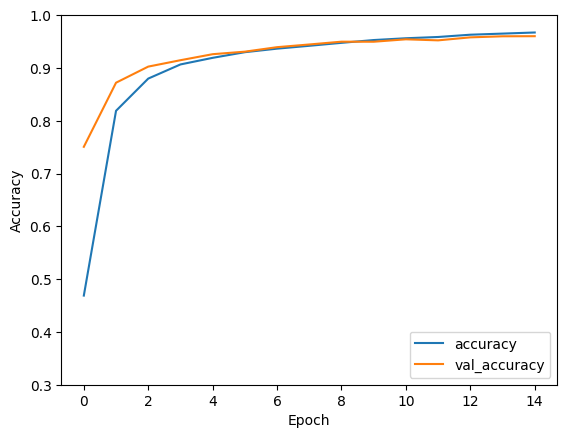

In [8]:
plt.figure()
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.3, 1])
plt.legend(loc='lower right')
plt.show()
# print('Test accuracy:', test_acc)

We can see that both training accuracy and testing are approximately 0.96 after 15 epochs.

2024-11-25 12:09:47.635466: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 2s 2s/step
[[1.18276275e-05 1.70204483e-04 9.94346678e-01 5.29062701e-03
  6.35987751e-09 4.70252850e-08 9.43720352e-07 6.08298797e-06
  1.72275264e-04 1.34202344e-06]]
prediction: 2


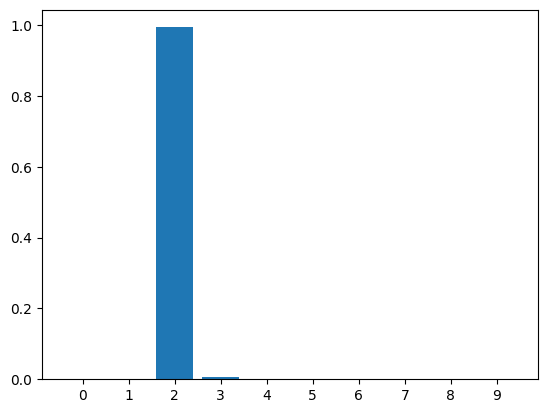

In [9]:
# demonstration: predict the ith test digit
i = 15
prediction = model.predict(test_images[i].reshape(1,28,28,1))

# get probability distribution and classification of the test digit
print(prediction)
print('prediction:', np.argmax(prediction))

# draw the barplot
plt.figure()
plt.bar(np.arange(0,10).astype('str'), prediction[0,:])
plt.show()

actual label: 2


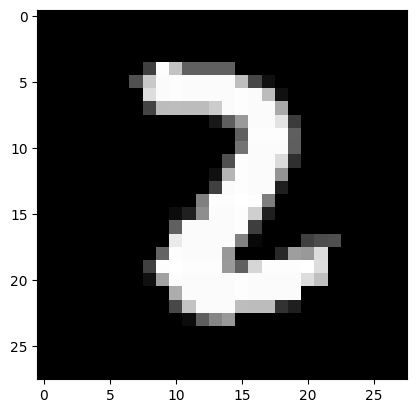

In [10]:
# show the actual ith digit
print('actual label:', np.argmax(test_labels[i]))
plt.figure()
plt.imshow(test_images[i,:,:,0], cmap='gray')
plt.show()

In [11]:
pred_labels = model.predict(test_images).argmax(axis=1)
true_labels = test_labels.argmax(axis=1)

313/313 [==============================] - 4s 9ms/step


2024-11-25 12:10:35.165478: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-11-25 12:10:35.165537: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 14539 MB memory) -> physical PluggableDevice (device: 0, name: DML, pci bus id: <undefined>)
2024-11-25 12:10:35.257339: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-11-25 12:10:35.257399: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 14539 MB memory) -> physical PluggableDevice (device: 0, name: 

Create confusion matrix and generate heatmap. This part is modified from https://androidkt.com/keras-confusion-matrix-in-tensorboard/

In [12]:
confusion_mat = tf.math.confusion_matrix(labels=true_labels, predictions=pred_labels).numpy()
confusion_mat

2024-11-25 12:10:39.036640: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-11-25 12:10:39.036693: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 14539 MB memory) -> physical PluggableDevice (device: 0, name: DML, pci bus id: <undefined>)


array([[ 970,    0,    3,    0,    0,    0,    3,    1,    3,    0],
       [   0, 1122,    2,    3,    0,    0,    5,    1,    2,    0],
       [  12,    0,  972,   12,    6,    0,    3,   14,    9,    4],
       [   3,    0,    9,  964,    0,   10,    1,    9,   12,    2],
       [   1,    2,    2,    0,  950,    0,    9,    2,    3,   13],
       [   7,    1,    1,    9,    1,  853,    8,    3,    9,    0],
       [  12,    4,    1,    0,    4,    6,  929,    0,    2,    0],
       [   3,    6,   23,    2,    6,    0,    0,  970,    5,   13],
       [   9,    0,    3,    7,    4,    6,    4,    7,  923,   11],
       [   8,    6,    1,    5,   10,   10,    0,   10,   11,  948]],
      dtype=int32)

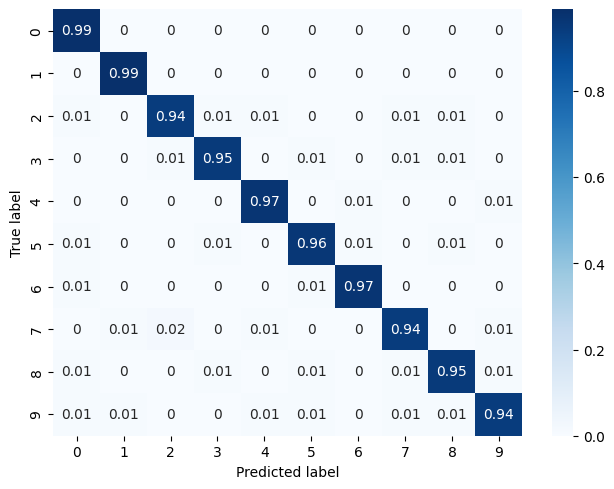

In [14]:
import pandas as pd
import seaborn as sns

# normalize
confusion_mat_norm = np.around(confusion_mat.astype('float') / np.atleast_2d(confusion_mat.sum(axis=1)).T, decimals=2)

classes = np.arange(0,10).astype('str')
confusion_mat_df = pd.DataFrame(confusion_mat_norm,
                                index = classes, 
                                columns = classes)

# generate heatmap
figure = plt.figure()
sns.heatmap(confusion_mat_df, annot=True, cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()